# [Project] 교통 표지판 이미지 분류

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# !ln -s /gdrive/MyDrive/CNN_master/오수진/dataset/dataset

Mounted at /content/drive


---

## 프로젝트 목표
- 교통 표지판 이미지 데이터를 분석하고 딥러딩 모델을 통하여 표지판 종류를 예측하는 분류 모델 수행
- 대량의 이미지 데이터를 전 처리하는 과정과 이에 따른 CNN 모델의 성능 변화를 학습
## 프로젝트 목차
1. **데이터 분석:** 이미지 데이터를 이루고 있는 요소에 대해서 Dataframe를 사용하여 분석 및 확인

2. **데이터 전 처리:** 이미지 데이터를 읽어오고 딥러닝 모델의 입력으로 전 처리

3. **딥러닝 모델:** CNN 모델을 구현하고 학습, 평가 및 예측을 수행

## 데이터 출처
-  https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

## 프로젝트 개요

차량 운전을 하면서 도로 교통 표지판을 보고 규칙을 지키는 것은 운전자의 및 교통 안전을 위해서 중요한 일입니다. 만일 사람이 아닌 기계가 이를 수행해야 한다면, 어떻게 표지판을 구분할 수 있을까요? 이러한 물음은 자율 주행차 기술이 발전하면서 중요한 이슈가 되었고, 딥러닝 기술 바탕의 분류 모델이 상당한 수준의 정확도를 보이며 적용되고 있습니다.

이번 프로젝트에서는 교통 표지판 분류의 첫 번째 스텝으로 간단하게 교통 표지판 이미지가 입력 되었을 때 이 것이 43 종의 표지판 중 어떤 것인가를 분류하는 딥러닝 모델을 구현합니다. 이를 통하여 교통 표지판 이미지 데이터들의 특징과 CNN 모델을 통하여 분류를 수행하는 것을 학습할 수 있습니다. 

In [ ]:
import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, Input,  MaxPooling2D, GlobalMaxPooling2D, ZeroPadding2D, AveragePooling2D, GlobalAveragePooling2D, BatchNormalization, Activation, add
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model


%matplotlib inline

In [ ]:
## GPU 사용시
## GPU 메모리 사용 크기만 할당

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    tf.config.experimental.set_memory_growth(gpus[0], True)
gpus

[]

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



## 1. 데이터 분석
### 1-1. 이미지 데이터 정보 파악하기
이미지 데이터를 읽어오기 위해서 `./data` 에 어떠한 파일들이 존재 하는지 확인해 봅시다.

In [ ]:
DATA_PATH = '/content/drive/MyDrive/CNN_master/송나은/dataset/'
DATA_PATH

'/content/drive/MyDrive/CNN_master/송나은/dataset/'

In [ ]:
file_list = os.listdir(DATA_PATH)
file_list

['Train.csv',
 'archive.zip',
 'Meta',
 'Test',
 'Meta.csv',
 'Test.csv',
 'Train',
 'meta',
 'test',
 'train',
 'unzip_data.ipynb']

#### Meta
3개의 폴더와 3개의 csv 파일이 있습니다. 일반적으로 이미지 데이터의 csv 파일이 제공되는 경우에는, 해당 이미지의 디렉토리 정보가 저장되어 있습니다.

그렇기에 먼저,csv 파일을 dataframe으로 읽어 보겠습니다.

In [ ]:
df_Meta = pd.read_csv(DATA_PATH + 'Meta.csv')
df_Meta

,Path,ClassId,ShapeId,ColorId,SignId
0,Meta/27.png,27,0,0,1.32
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29
3,Meta/10.png,10,1,0,3.27
4,Meta/11.png,11,0,0,1.22
5,Meta/12.png,12,2,2,2.3
6,Meta/13.png,13,4,0,2.1
7,Meta/14.png,14,3,0,2.2
8,Meta/15.png,15,1,0,3.1
9,Meta/16.png,16,1,0,3.3


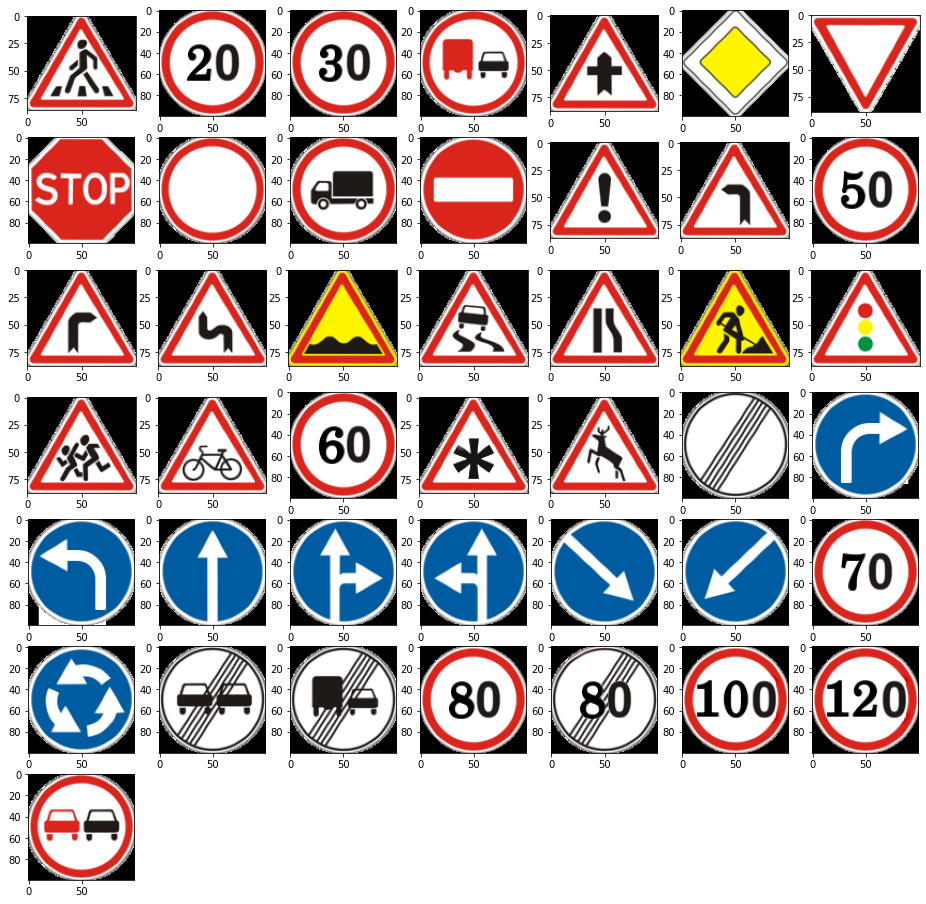

In [ ]:
Meta_images = []
Meta_labels = []

plt.figure(figsize=(16,16))
for i in range(len(df_Meta)):
    img = load_img(DATA_PATH + df_Meta['Path'][i])
    plt.subplot(7, 7, i+1)
    plt.imshow(img)
    Meta_images.append(img)
    Meta_labels.append(df_Meta['ClassId'])

#### Train
이번엔 `Train.csv`를 확인해 봅시다.

In [ ]:
df_Train = pd.read_csv(DATA_PATH + 'Train.csv')
df_Train

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png
...,...,...,...,...,...,...,...,...
39204,52,56,5,6,47,51,42,Train/42/00042_00007_00025.png
39205,56,58,5,5,51,53,42,Train/42/00042_00007_00026.png
39206,58,62,5,6,53,57,42,Train/42/00042_00007_00027.png
39207,63,69,5,7,58,63,42,Train/42/00042_00007_00028.png


39209개의 학습용 이미지 데이터에 대한 정보가 저장되어 있음을 알 수 있습니다.

이러한 이미지 정보 중에 먼저 `Width`와 `Height`에 대해서 알아봅시다.

`Width`와 `Height` 정보는 이미지의 폭과 높이에 대한 정보로 간단히 샘플만 봐도 다양한 크기를 갖는 것을 알 수 있습니다.

이미지 크기가 모두 다르다면 이미지마다 서로 다른 feature의 개수가 있는 것이기에 이를 통일해주는 전 처리가 필요합니다.

그렇다면 어떤 크기로 통일을 해야 할까요? 이미지 크기의 분포를 보고 판단해봅시다.

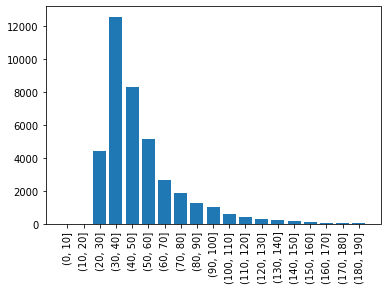

(0, 10]           0
(10, 20]          0
(20, 30]       4425
(30, 40]      12561
(40, 50]       8285
(50, 60]       5169
(60, 70]       2658
(70, 80]       1845
(80, 90]       1287
(90, 100]      1007
(100, 110]      598
(110, 120]      426
(120, 130]      298
(130, 140]      212
(140, 150]      165
(150, 160]       99
(160, 170]       70
(170, 180]       39
(180, 190]       21
Name: Width, dtype: int64

In [ ]:
dist = pd.cut(df_Train['Width'], np.arange(0,200,10)).value_counts(sort=False)
plt.bar(dist.index.astype(str), dist.values)
plt.xticks(rotation=90)
plt.show()

dist

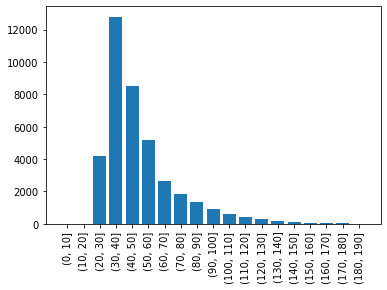

(0, 10]           0
(10, 20]          0
(20, 30]       4159
(30, 40]      12797
(40, 50]       8530
(50, 60]       5208
(60, 70]       2635
(70, 80]       1817
(80, 90]       1338
(90, 100]       937
(100, 110]      577
(110, 120]      405
(120, 130]      295
(130, 140]      188
(140, 150]      134
(150, 160]       80
(160, 170]       42
(170, 180]       32
(180, 190]        8
Name: Height, dtype: int64

In [ ]:
dist = pd.cut(df_Train['Height'], np.arange(0,200,10)).value_counts(sort=False)
plt.bar(dist.index.astype(str), dist.values)
plt.xticks(rotation=90)
plt.show()

dist

위 분포를 보게 되면 30~40의 폭 또는 높이를 갖는 이미지가 제일 많음을 확인했습니다. 

이미지 크기를 통일하는 데 있어서 너무 작은 이미지는 큰 이미지의 정보 손실을 발생하며, 너무 큰 이미지는 작은 이미지의 정보 부족한 정보량을 부각할 것입니다. 

따라서 적절한 이미지 크기를 잡는 것은 하나의 파라미터 조정이 되며, 이번 프로젝트에서는 이미지 분포 기반으로 대다수를 차지하는 크기인 33x33 크기로 통일하겠습니다. (이후, 개인적인 실습에서 데이터 크기 조절에 따른 성능 변화를 살펴보는 것도 좋은 학습이 될 것입니다.)

#### \* 이미지 사이즈
128 x 128 : test accuracy 91%, 250ms/step  
64 x 64 : test accuracy 96.5%, 80ms/step   
<span style="color:red">32 x 32 : test accuracy 96.5%, 22ms/step</span>    
16 x 16 : test accuracy 79.7%, 22ms/step

In [ ]:
image_height = 32
image_width = 32
image_channel = 3 # 컬러 이미지이기에 3채널

이번엔 Roi 데이터에 대해서 살펴봅시다. 이미지 데이터에서 Roi는 Region of interest의 약자로 지금 데이터에서는 표지판이 있는 부분을 의미합니다.

`Train.csv`, `Test.csv` 파일에 있는 Roi 데이터는 아래 실행된 이미지에서의 좌측 상단 좌표와 우측 하단 좌표를 의미합니다.

Roi 데이터를 사용하면 보다 명확하게 표지판 부분만을 crop 할 수 있으며, 이러한 데이터 전 처리를 통하여 분류의 성능을 높일 수 있습니다. (이번 프로젝트에서는 해당 전 처리를 생략합니다.)

#### Test
이번엔 `Test.csv`를 살펴보겠습니다.

In [ ]:
df_Test = pd.read_csv(DATA_PATH + 'Test.csv')
df_Test

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
...,...,...,...,...,...,...,...,...
12625,42,41,5,6,37,36,12,Test/12625.png
12626,50,51,6,5,45,46,33,Test/12626.png
12627,29,29,6,6,24,24,6,Test/12627.png
12628,48,49,5,6,43,44,7,Test/12628.png


Train.csv와 같은 형태로 구성되어 있는 것을 알 수 있습니다. test 데이터에 대해서는 분석하는 것은 표지판을 분류 하는 목적에 있어 큰 의미가 있지 않기에 이번 실습에서는 생략합니다.

## 2. 데이터 전 처리
### 2-1. 이미지 데이터 Generator 만들기
학습과 평가에 사용할 데이터 generator를 만들어 보겠습니다. 데이터를 전부 메모리에 불러오는 방법, 폴더를 지정하여 만드는 방법, pandas의 DataFrame을 이용한 방법이 있는데 여기서는 데이터를 전부 메모리에 불러오는 방법을 이용해 generator를 생성하겠습니다.

In [ ]:
import h5py

사전에 이미지들을 모두 불러와 데이터 타입을 numpy array 형태로 바꾼 후에 h5 파일로 저장합니다. 처음 한번만 저장한 후에는 사용하지 않습니다. Google Colab에서 사용할 시에는 로컬에서 h5 파일을 만들어 저장 후 google drive에 h5 파일을 업로드 하는 방법을 추천합니다.

#### \* Test size
0.2 : test accuracy 96.5%    
0.4 : test accuracy 92.1%   

In [ ]:
%time

def load_images_from_h5py(path1, path2):
    h5f = h5py.File(path1, 'r')
    data1 = h5f.get('images')[()]
    h5f.close()
    
    h5f = h5py.File(path2, 'r')
    data2 = h5f.get('images')[()]
    h5f.close()
    
    return data1, data2

path_train_data = '/content/drive/MyDrive/CNN_master/송나은/train_images.h5'
path_test_data = '/content/drive/MyDrive/CNN_master/송나은/test_images.h5'

train_images, test_images = load_images_from_h5py(path_train_data, path_test_data)

# Train : 80% Valid: 20% 나누기
train_images, valid_images, train_labels, valid_labels = train_test_split(train_images, df_Train.ClassId, test_size=0.2)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


이제 DataFrame을 이용하여 generator를 생성합니다. 공통적으로 사용될 argument 들은 미리 지정해 두고, 각 generator의 필요한 argument는 각자 정의합니다. 먼저 ImageDataGenerator를 생성하고 (여기서 Data Augmentation 설정이 가능합니다), 후에 method인 flow를 이용하여 iterator를 생성합니다.
Train, Validation, Test generator 들을 각각 생성합니다.

#### \* data generator
기본 : test accuracy 87.8%, 33ms/step     
\+ brightness_range : test accuracy 88.8%, 33ms/step      
\+ zoom_range 0.2 (Train만) / rotation_range 20 : test accuracy 96.5%      
\+ zoom_range=0.2 (전체) / shear_range=0.2 : test accuracy 92.5%

In [ ]:
datagen_kwargs = dict(rescale=1./255)
dataflow_kwargs = dict()

# Train
train_datagen = ImageDataGenerator(
        zoom_range=0.2,
        rotation_range = 20,
        brightness_range=[0.6,1.0],
    **datagen_kwargs
)

train_generator = train_datagen.flow(
    train_images, 
    y=train_labels,
    **dataflow_kwargs
)

# Validation
valid_datagen = ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow(
    valid_images,
    y=valid_labels,
    shuffle=False, 
    **dataflow_kwargs
)

# Test
test_datagen = ImageDataGenerator(**datagen_kwargs)
test_generator = test_datagen.flow(
    test_images, 
    y=df_Test.ClassId, 
    shuffle=False, 
    **dataflow_kwargs
)

## 3. 딥러닝 모델

## 기본 CNN 모델
CNN을 사용하여 간단하게 모델을 구현해 보겠습니다. filters, kernel 등의 사이즈는 하이퍼 파리미터로 자신만의 모델로 튜닝이 가능합니다.

#### \* CNN 모델 설정


In [ ]:
model = Sequential([
    Input((image_height, image_width, image_channel)),
    Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    
    Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(rate=0.25),
    Dense(43, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 256)       7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 512)       1180160   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 512)         0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                2097216   
_________________________________________________________________
dropout (Dropout)            (None, 64)                0

In [ ]:
callbacks = [
  tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5),
  tf.keras.callbacks.ModelCheckpoint(filepath='model.h5', monitor='val_accuracy', save_best_only=True),
]

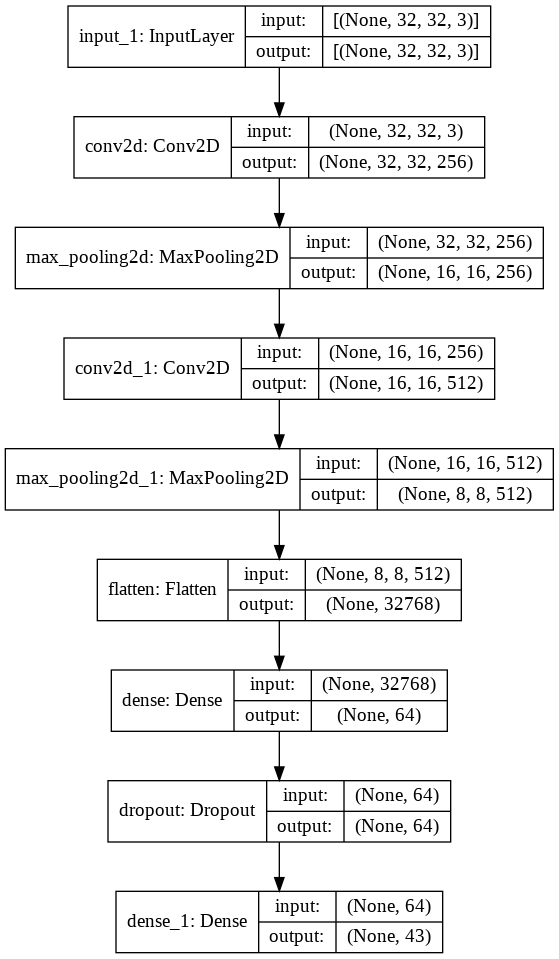

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

#### 3-2. 학습 수행
43개의 class를 갖는 데이터이기에 loss 함수로 `sparse_categorical_crossentropy`을 설정하고 optimizer로는 SGD를 사용하여 학습하여 보겠습니다.

#### \* optimizer
SGD : test accuracy 88.8%    
<span style="color:red">Momentum 0.9 : test accuracy 95.6%</span>     
Adagrad : test accuracy 91%      
RMSprop : test accuracy 51%    
Adam : test accuracy 5.9%

#### \* Learning Rate
0.01 : test accuracy 96.5%    
0.001 : test accuracy 89.2%  

In [ ]:
model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    metrics=['accuracy']
)

In [ ]:
# 처음 만든 모델이라면 EPOCHS를 1~5개로 하여 잘 돌아가는지 
# 성능을 확인해보고 값을 증가 시켜 봅시다. 
EPOCHS = 100

# EPOCHS에 따른 성능을 보기 위하여 history 사용
history = model.fit(
    train_generator,
    validation_data = valid_generator, # validation 데이터 사용
    epochs=EPOCHS, 
    callbacks=callbacks,
)

Epoch 1/100
891/981 [==========================>...] - ETA: 1:53 - loss: 2.8787 - accuracy: 0.2206

학습을 수행하면서 Accuracy와 Loss의 변화를 그래프로 출력하면 다음과 같습니다.

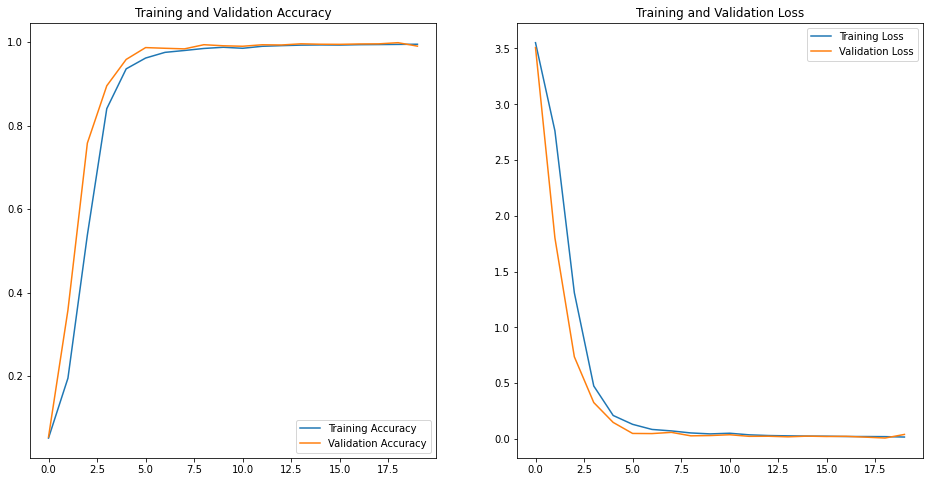

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### 3-3. 모델 성능 평가 및 예측
학습이 잘 수행 되었으면 평가용 데이터에서 성능이 잘 나오는지 확인합니다.

In [ ]:
model.load_weights('./model.h5')

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)

print('test set accuracy: ', test_accuracy)

395/395 [==============================] - 3s 8ms/step - loss: 0.1787 - accuracy: 0.9651
test set accuracy:  0.965083122253418


이번엔 테스트 데이터를 입력하여 예측된 결과를 비교해 보겠습니다.

25개의 테스트 데이터를 불러와 실제 class와 예측 class를 출력하면 다음과 같습니다.

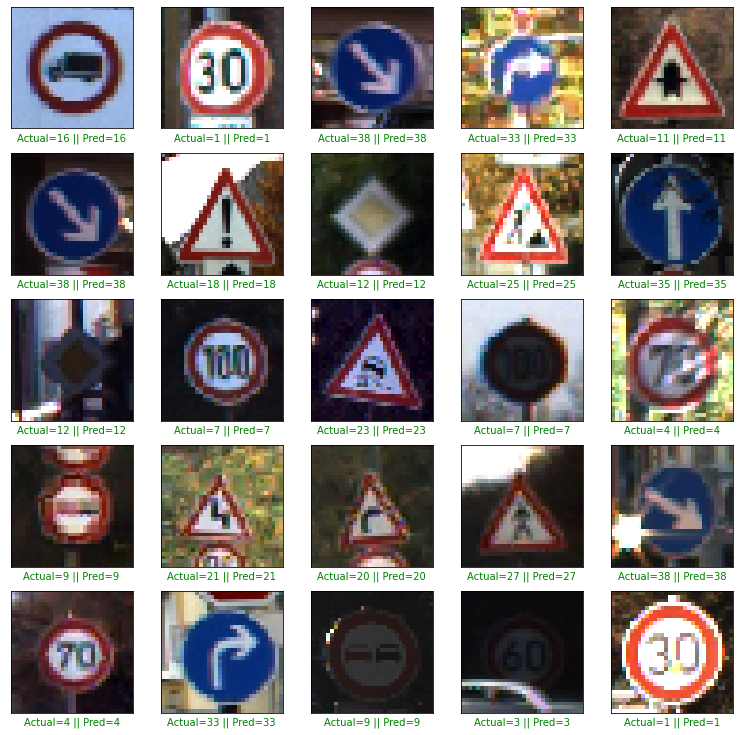

In [ ]:
plt.figure(figsize = (13, 13))
x_test, y_test = test_generator.next()
pred_test = model.predict_on_batch(x_test)
pred_class = np.argmax(pred_test, axis=-1)

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred_class[start_index + i]
    actual = int(y_test[start_index + i])
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(array_to_img(x_test[start_index + i]))
plt.show()

In [ ]:
test_prediction = model.predict(test_generator)
predicted_class = np.argmax(test_prediction, axis=-1)

마지막으로 confusion matrix를 시각화 하여 분류 학습 결과를 확인해봅니다.

In [ ]:
test_generator.y

array([16,  1, 38, ...,  6,  7, 10])

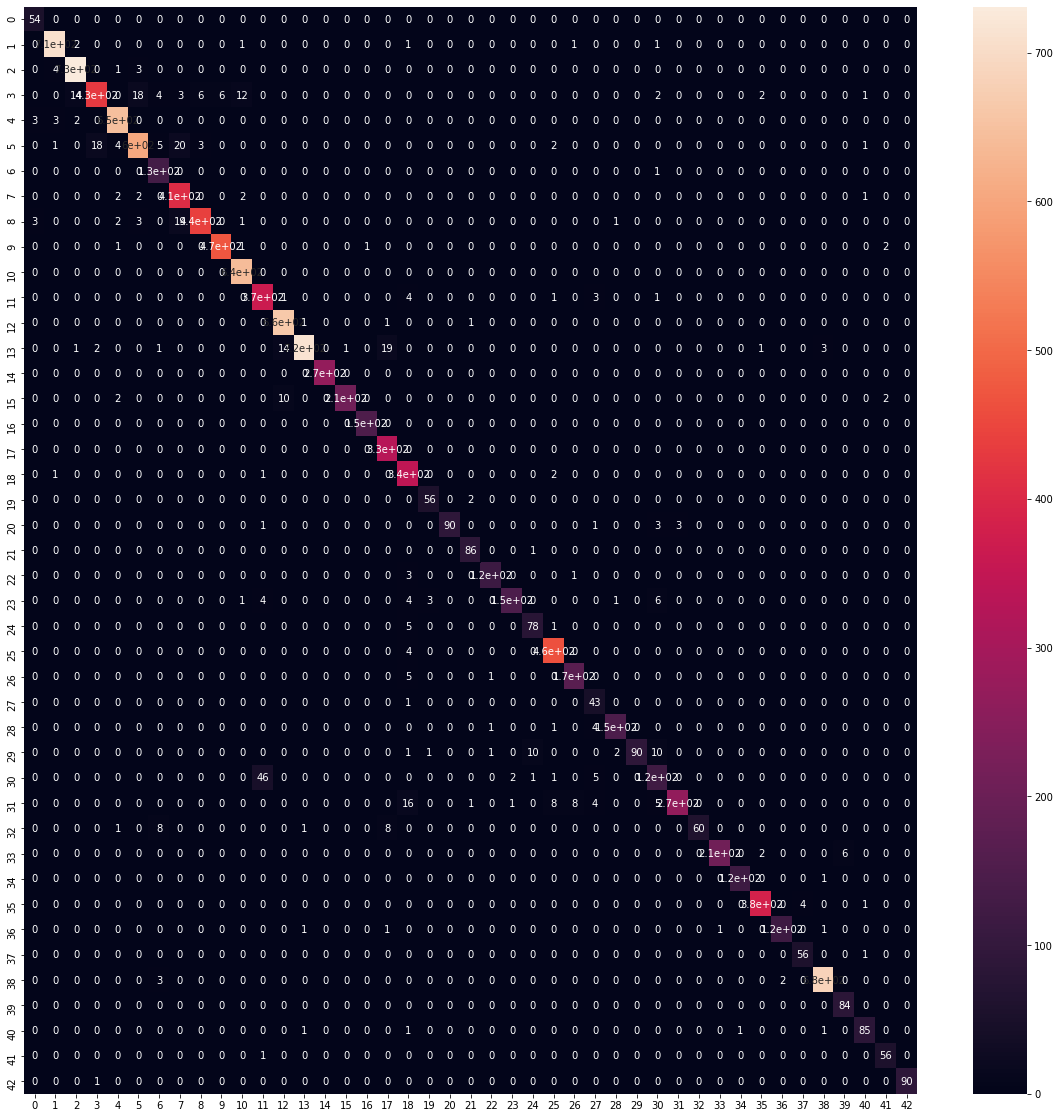

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predicted_class, test_generator.y)
plt.figure(figsize = (20, 20))
sns.heatmap(cm, annot = True)
plt.show()

## VGGNet
Globalize ? pooloing

In [ ]:
def conv(filters, kernel_size = 3, activation= tf.nn.relu, padding= 'same'):
    return keras.layers.Conv2D(filters = filters, kernel_size = kernel_size, activation= activation, padding= padding)

In [ ]:
model = keras.Sequential()

img_size = 32

# 첫 번째 Conv Block
# 입력 Shape는 ImageNet 데이터 세트의 크기와 같은 RGB 영상 (224 x 224 x 3)입니다
model.add(Input((img_size, img_size, 3)))
model.add(conv(64))
model.add(conv(64))
model.add(keras.layers.MaxPooling2D(pool_size = 2, strides = 2))

# 두 번째 Conv Block
model.add(conv(128))
model.add(conv(128))
model.add(keras.layers.MaxPooling2D(pool_size = 2, strides = 2))

# 세 번째 Conv Block
model.add(conv(256))
model.add(conv(256))
model.add(conv(256))
model.add(keras.layers.MaxPooling2D(pool_size = 2, strides = 2))

# 네 번째 Conv Block
model.add(conv(512))
model.add(conv(512))
model.add(conv(512))
model.add(keras.layers.MaxPooling2D(pool_size = 2, strides = 2))

# 다섯 번째 Conv Block
model.add(conv(512))
model.add(conv(512))
model.add(conv(512))
model.add(keras.layers.MaxPooling2D(pool_size = 2, strides = 2))

# Fully Connected Layer
model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(4096, activation= tf.nn.relu))
model.add(keras.layers.Dense(512, activation= tf.nn.relu))
model.add(keras.layers.Dense(58, activation= tf.nn.softmax))
  
model.summary()

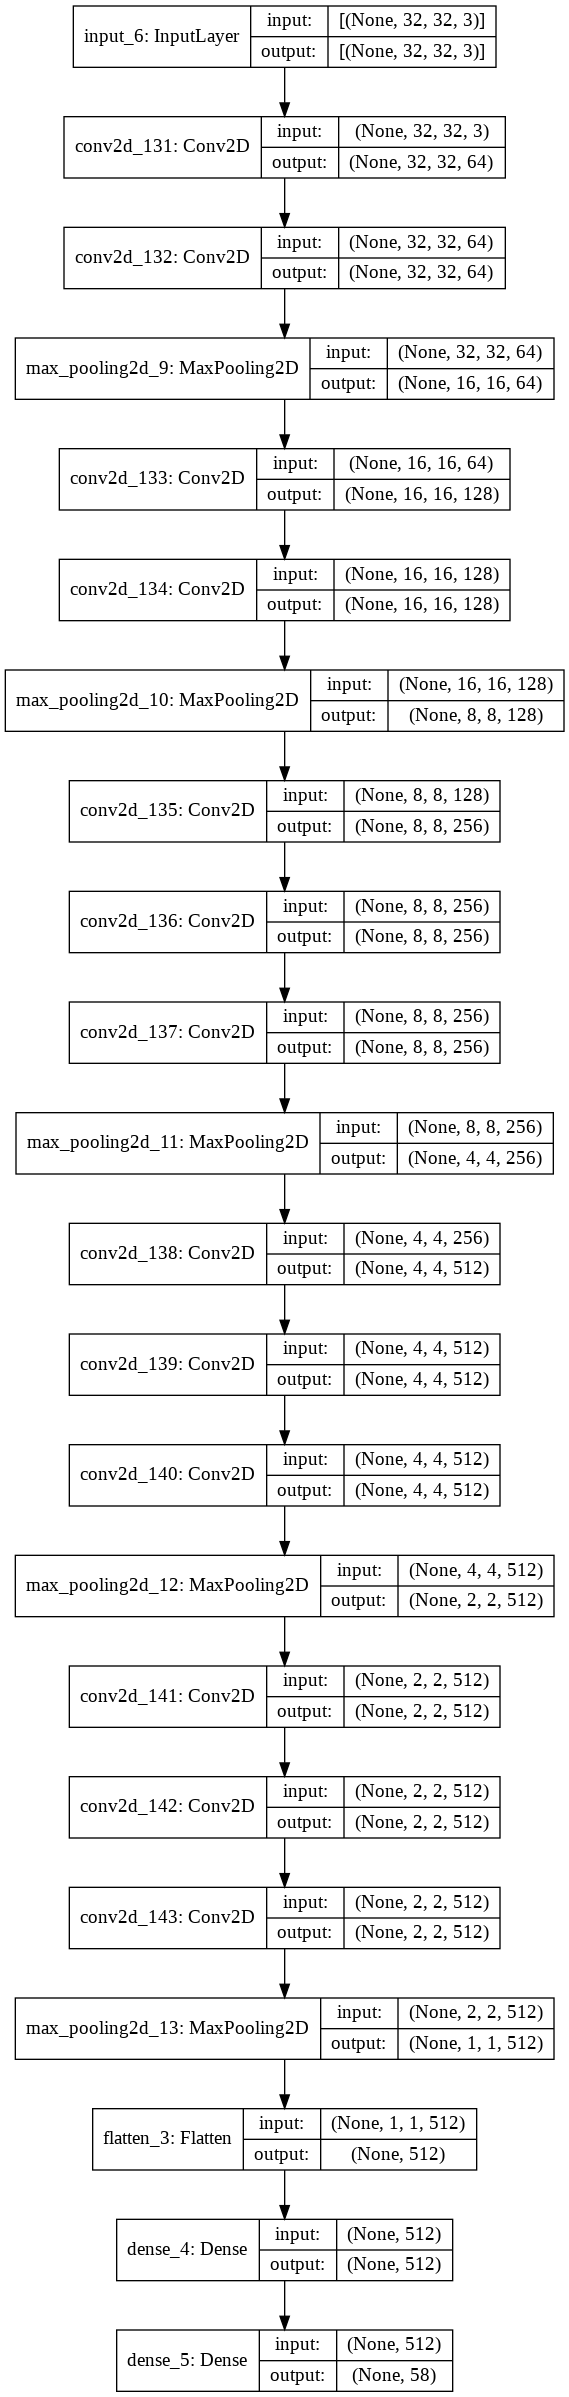

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, momentum=0.9),
    metrics=['accuracy']
)

In [ ]:
# 처음 만든 모델이라면 EPOCHS를 1~5개로 하여 잘 돌아가는지 
# 성능을 확인해보고 값을 증가 시켜 봅시다. 
EPOCHS = 20

# EPOCHS에 따른 성능을 보기 위하여 history 사용
history = model.fit(
    train_generator,
    validation_data = valid_generator, # validation 데이터 사용
    epochs=EPOCHS, 
)

Epoch 1/20
981/981 [==============================] - 31s 31ms/step - loss: 3.6486 - accuracy: 0.0509 - val_loss: 3.5079 - val_accuracy: 0.0546
Epoch 2/20
981/981 [==============================] - 31s 32ms/step - loss: 3.2462 - accuracy: 0.1102 - val_loss: 1.8022 - val_accuracy: 0.3583
Epoch 3/20
981/981 [==============================] - 31s 31ms/step - loss: 1.5767 - accuracy: 0.4506 - val_loss: 0.7368 - val_accuracy: 0.7578
Epoch 4/20
981/981 [==============================] - 31s 32ms/step - loss: 0.5837 - accuracy: 0.7959 - val_loss: 0.3265 - val_accuracy: 0.8951
Epoch 5/20
981/981 [==============================] - 31s 31ms/step - loss: 0.2393 - accuracy: 0.9256 - val_loss: 0.1484 - val_accuracy: 0.9582
Epoch 6/20
981/981 [==============================] - 31s 31ms/step - loss: 0.1381 - accuracy: 0.9594 - val_loss: 0.0495 - val_accuracy: 0.9865
Epoch 7/20
981/981 [==============================] - 31s 32ms/step - loss: 0.0878 - accuracy: 0.9735 - val_loss: 0.0483 - val_accuracy:

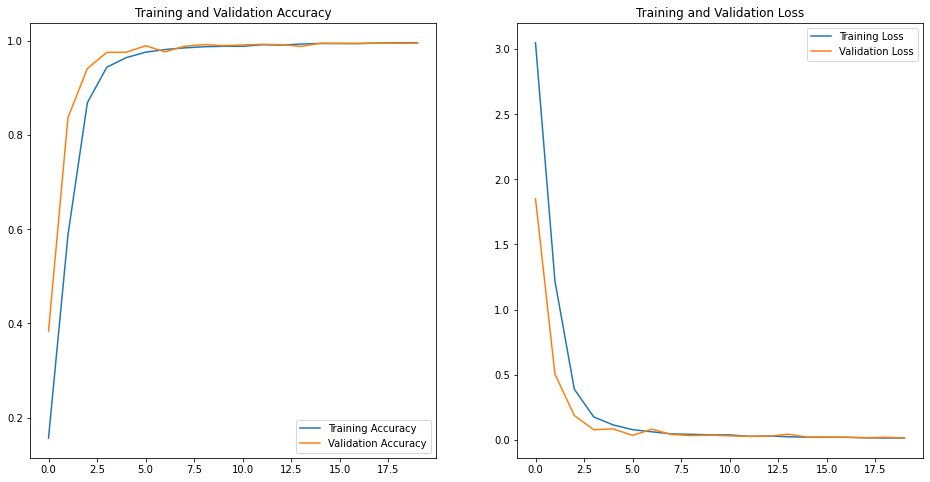

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)

print('test set accuracy: ', test_accuracy)

395/395 [==============================] - 3s 6ms/step - loss: 0.1645 - accuracy: 0.9663
test set accuracy:  0.9663499593734741


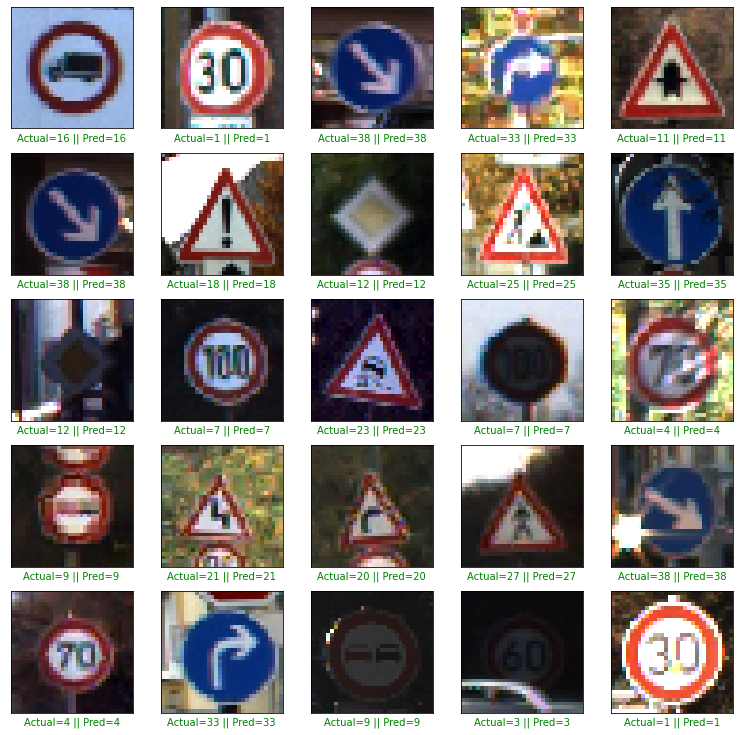

In [ ]:
plt.figure(figsize = (13, 13))
x_test, y_test = test_generator.next()
pred_test = model.predict_on_batch(x_test)
pred_class = np.argmax(pred_test, axis=-1)

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred_class[start_index + i]
    actual = int(y_test[start_index + i])
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(array_to_img(x_test[start_index + i]))
plt.show()

## ResNet

In [ ]:
def identity_block(input_tensor, kernel_size, filters):
    
    filters1, filters2, filters3 = filters
    
    x = Conv2D(filters1, (1, 1))(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1))(x)
    x = BatchNormalization()(x)
    
    '''
    지시사항 1번
    아래 내용을 채워 identity_block()을 완성하세요.
    '''
    # 입력(x) : input_tensor와 F(x) : x를 더해줍니다.
    # TODO : add()와 Activation() 메서드를 사용해서 relu(F(x) + x) 의 형태로 만들어보세요. 
    x = add([x, input_tensor])
    x = Activation('relu')(x)
    return x


def residual_block(input_tensor, kernel_size, filters, strides=(2, 2)):
    filters1 , filters2 , filters3 = filters
    
    # 입력 Feature Map의 Size를 1/2로 줄이는 대신 Feature map의 Dimension을 2배로 늘려줍니다.
    x = Conv2D(filters1, (1, 1), strides=strides)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1))(x)
    x = BatchNormalization()(x)
    
    
    '''
    지시사항 2번
    아래 내용을 채워 residual_block()을 완성하세요.
    '''
    # TODO : Projection Shortcut Connection을 구현해보세요.
    # 1 x 1 Convolution 연산을 수행하여 Dimension을 2배로 증가시키고
    # 입력 Feature map의 size를 1/2로 축소시켜보세요.
    shortcut = Conv2D(filters3, (1, 1), strides=strides)(input_tensor)
    shortcut = BatchNormalization()(shortcut)

    # F(x) : x와 Shortcut Connection : shortcut을 더해줍니다.
    # TODO : add()와 Activation() 메서드를 사용해서 relu(F(x) + shortcut) 의 형태로 만들어보세요.
    x = add([x, shortcut])
    x = Activation('relu')(x)
    return x

In [ ]:
shape = (image_height,image_width,3)
inputs = Input(shape)

# 입력 영상의 크기를 줄이기 위한 Conv & Max-pooling
x = Conv2D(64, (3, 3), strides=(1, 1))(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)

# 첫 번째 Residual Block (입력 영상 Size 2배 축소 / Dimension 2배 증가)
x = residual_block(x, 3, [64, 64, 256], strides=(1, 1))
x = identity_block(x, 3, [64, 64, 256])
x = identity_block(x, 3, [64, 64, 256])


# # 두 번째 Residual Block (입력 영상 Size 2배 축소 / Dimension 2배 증가)
# x = residual_block(x, 3, [128, 128, 512])
# x = identity_block(x, 3, [128, 128, 512])
# x = identity_block(x, 3, [128, 128, 512])
# x = identity_block(x, 3, [128, 128, 512])

# # 세 번째 Residual Block (입력 영상 Size 2배 축소 / Dimension 2배 증가)
# x = residual_block(x, 3, [256, 256, 1024])
# x = identity_block(x, 3, [256, 256, 1024])
# x = identity_block(x, 3, [256, 256, 1024])
# x = identity_block(x, 3, [256, 256, 1024])
# x = identity_block(x, 3, [256, 256, 1024])
# x = identity_block(x, 3, [256, 256, 1024])

# # 네 번째 Residual Block (입력 영상 Size 2배 축소 / Dimension 2배 증가)
# x = residual_block(x, 3, [512, 512, 2048])
# x = identity_block(x, 3, [512, 512, 2048])
# x = identity_block(x, 3, [512, 512, 2048])

# 마지막단에서 FC layer를 쓰지 않고 단순히 Averaging 합니다.
# x = AveragePooling2D((7, 7))(x)
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
# 43개의 Class 구분
x = Dense(43, activation='softmax')(x)

# 모델 구성
model = Model(inputs, x)

model.summary()

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    metrics=['accuracy']
)

In [ ]:
# 처음 만든 모델이라면 EPOCHS를 1~5개로 하여 잘 돌아가는지 
# 성능을 확인해보고 값을 증가 시켜 봅시다. 
EPOCHS = 5

# EPOCHS에 따른 성능을 보기 위하여 history 사용
history = model.fit(
    train_generator,
    validation_data = valid_generator, # validation 데이터 사용
    epochs=EPOCHS
)

Epoch 1/5
981/981 [==============================] - 31s 24ms/step - loss: 2.2584 - accuracy: 0.3775 - val_loss: 1.5554 - val_accuracy: 0.5567
Epoch 2/5
981/981 [==============================] - 23s 23ms/step - loss: 0.4804 - accuracy: 0.8509 - val_loss: 0.4395 - val_accuracy: 0.8591
Epoch 3/5
981/981 [==============================] - 23s 24ms/step - loss: 0.2399 - accuracy: 0.9253 - val_loss: 0.2916 - val_accuracy: 0.9095
Epoch 4/5
981/981 [==============================] - 23s 23ms/step - loss: 0.1498 - accuracy: 0.9554 - val_loss: 0.1772 - val_accuracy: 0.9475
Epoch 5/5
981/981 [==============================] - 22s 23ms/step - loss: 0.1070 - accuracy: 0.9674 - val_loss: 0.2892 - val_accuracy: 0.9116


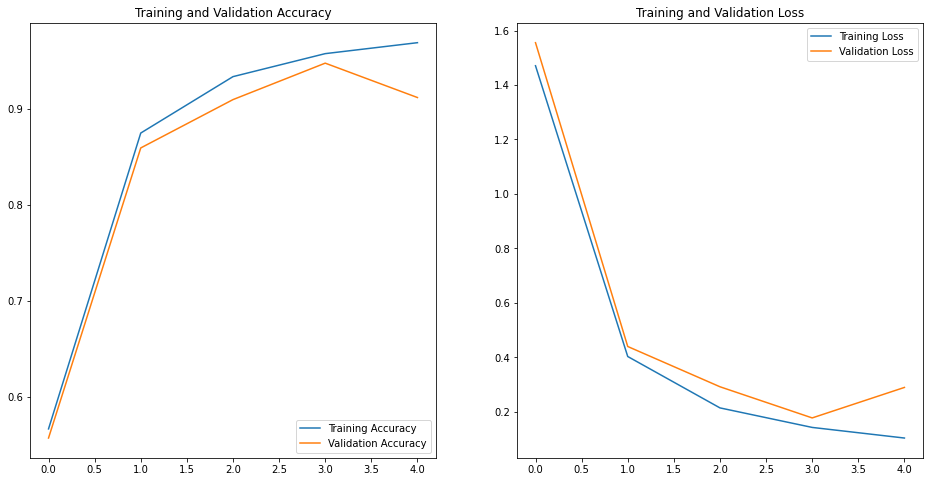

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)

print('test set accuracy: ', test_accuracy)

395/395 [==============================] - 1s 3ms/step - loss: 0.5281 - accuracy: 0.8622
test set accuracy:  0.8622328042984009
